(371, 371, 3)


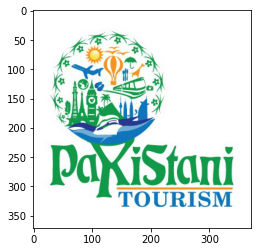

In [4]:
import matplotlib.pyplot as plt
# read the image in 
photo=plt.imread("download (1).jpg")
print(photo.shape)
plt.imshow(photo)


<h1 align=center><font size = 5>Facilities for arriving guests at Primary International Airports in Pakistan</font></h1>

### Introduction to the project

Pakistan has mainly 3 main International Airports where foreigners come to visit Pakistan. These airports are in the cities 

1. Karachi
2. Lahore
3. Islamabad

This project highlights the main venues located near these airports that could be utilised for leisure and dining by the incoming foerigners that could taste the modern facilities of these cities before going on for their work/business trip around the city/country. 

One by one, I will map out the locations close to the Airports in each city indicating the type of venues and faclities that they have.

#### Import required libraries

In [3]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [4]:
!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.9.1
  latest version: 4.9.2

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

Libraries imported.


## 1. Karachi

Getting location for Karachi City

In [177]:
address = 'Karachi City, KHI'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
khi_latitude = location.latitude
khi_longitude = location.longitude
print('The geograpical coordinate of Karachi City are {}, {}.'.format(khi_latitude, khi_longitude))

The geograpical coordinate of Karachi City are 24.90081895, 67.15941877702615.


Map of Karachi

In [178]:
# create map of Karachi using latitude and longitude values
map_karachi = folium.Map(location=[khi_latitude, khi_longitude], zoom_start=12)

# add a red circle marker to represent the Airport
folium.CircleMarker(
    [khi_latitude, khi_longitude],
    radius=10,
    color='red',
    popup='Karachi International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_karachi)

map_karachi

#### Foursquare ID and Credentials

In [179]:
CLIENT_ID = 'RXLAKTPOOGZPJQS0HJ4TMT0ULANSEV5QOTPWII3G5AM24AXX' # your Foursquare ID
CLIENT_SECRET = '0FPGQCNGJY5LJ5REGK442BOP1TY54YMHVUDWZ3EE235JMQXP' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RXLAKTPOOGZPJQS0HJ4TMT0ULANSEV5QOTPWII3G5AM24AXX
CLIENT_SECRET:0FPGQCNGJY5LJ5REGK442BOP1TY54YMHVUDWZ3EE235JMQXP


In [180]:

LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 10000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    khi_latitude, 
    khi_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RXLAKTPOOGZPJQS0HJ4TMT0ULANSEV5QOTPWII3G5AM24AXX&client_secret=0FPGQCNGJY5LJ5REGK442BOP1TY54YMHVUDWZ3EE235JMQXP&v=20180604&ll=24.90081895,67.15941877702615&radius=10000&limit=100'

In [181]:
khi_results = requests.get(url).json()
khi_results

{'meta': {'code': 200, 'requestId': '5fc9aa00e02006393a3c9a4b'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 107,
  'suggestedBounds': {'ne': {'lat': 24.99081904000009,
    'lng': 67.25845768158402},
   'sw': {'lat': 24.810818859999912, 'lng': 67.06037987246827}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '522b53a6498e71bacd9747bf',
       'name': 'Ramada Plaza Hotel Pool BBQ',
       'location': {'lat': 24.894330849893404,
        'lng': 67.15655462550713,
        'labeledLatLngs': [{'label': 'display',
          'lat': 24.894330849893404,
          '

In [182]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Getting a list of venues near Karachi International Airport

In [190]:
khi_venues = khi_results['response']['groups'][0]['items']
    
khi_nearby_venues = json_normalize(khi_venues) # flatten JSON

# filter columns
khi_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
khi_nearby_venues =khi_nearby_venues.loc[:, khi_filtered_columns]

# filter the category for each row
khi_nearby_venues['venue.categories'] = khi_nearby_venues.apply(get_category_type, axis=1)

# clean columns
khi_nearby_venues.columns = [col.split(".")[-1] for col in khi_nearby_venues.columns]

khi_nearby_venues

/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  This is separate from the ipykernel package so we can avoid doing imports until


,name,categories,lat,lng
0,Ramada Plaza Hotel Pool BBQ,BBQ Joint,24.894331,67.156555
1,14th Street Pizza,Pizza Place,24.910596,67.096607
2,California Pizza,Pizza Place,24.907824,67.109657
3,Pizza Max,Pizza Place,24.905053,67.182587
4,Butler's Chocolate Cafe,Coffee Shop,24.901609,67.166128
5,GreenO Juice Bar,Juice Bar,24.900660,67.116734
6,Pakistan Air Force (PAF) Museum,History Museum,24.869072,67.094364
7,Continental Bakery,Bakery,24.918897,67.118315
8,Luckyone Mall,Shopping Mall,24.932513,67.086961
9,Aga Khan Sports & Rehabilitation Center,Gym / Fitness Center,24.892157,67.079419


In [189]:
print('{} venues were returned by Foursquare.'.format(khi_nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [185]:
count_khi = khi_nearby_venues.groupby('categories').count()

<AxesSubplot:xlabel='categories'>

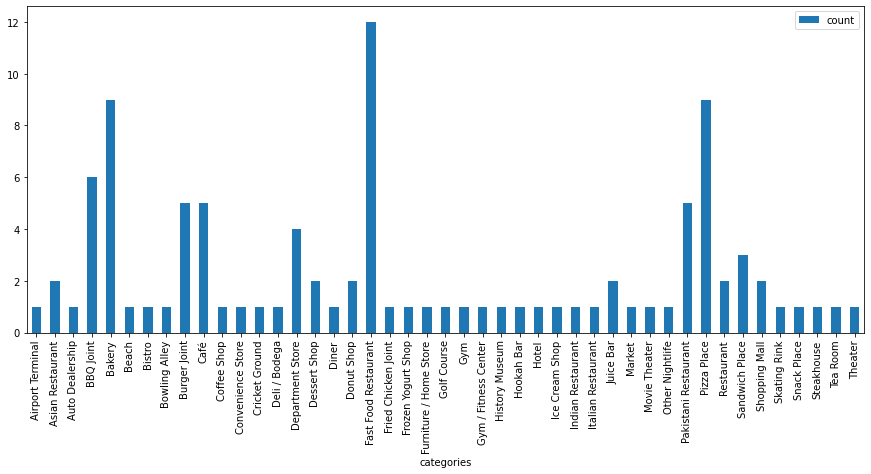

In [186]:
count_khi.reset_index(inplace=True)

count_khi = count_khi[['categories', 'name']]
count_khi = count_khi.rename(columns={'name': 'count'})
count_khi.set_index('categories', inplace=True)
count_khi.plot(kind='bar', figsize=(15,6))

In [187]:
count_khi2 = count_khi.transpose()
count_khi2

categories,Airport Terminal,Asian Restaurant,Auto Dealership,BBQ Joint,Bakery,Beach,Bistro,Bowling Alley,Burger Joint,Café,Coffee Shop,Convenience Store,Cricket Ground,Deli / Bodega,Department Store,Dessert Shop,Diner,Donut Shop,Fast Food Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Golf Course,Gym,Gym / Fitness Center,History Museum,Hookah Bar,Hotel,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Juice Bar,Market,Movie Theater,Other Nightlife,Pakistani Restaurant,Pizza Place,Restaurant,Sandwich Place,Shopping Mall,Skating Rink,Snack Place,Steakhouse,Tea Room,Theater
count,1,2,1,6,9,1,1,1,5,5,1,1,1,1,4,2,1,2,12,1,1,1,1,1,1,1,1,1,1,1,1,2,1,1,1,5,9,2,3,2,1,1,1,1,1


In [193]:
khi_venues_map = folium.Map(location=[khi_latitude, khi_longitude], zoom_start=13) # generate map centred around the Airport

# add a red circle marker to represent the 
folium.CircleMarker(
    [khi_latitude, khi_longitude],
    radius=10,
    color='red',
    popup='Karachi International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(khi_venues_map)

# add the Italian restaurants as blue circle markers
for lat, lng, label in zip(khi_nearby_venues.lat, khi_nearby_venues.lng, khi_nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(khi_venues_map)

# display map
khi_venues_map

## 2. Lahore

Getting location for Lahore city

In [5]:
address = 'Lahore City, LHR'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
lhr_latitude = location.latitude
lhr_longitude = location.longitude
print('The geograpical coordinate of Lahore City are {}, {}.'.format(lhr_latitude, lhr_longitude))


The geograpical coordinate of Lahore City are 31.5257977, 74.3633146.


Map of Lahore

In [48]:
# create map of lahore using latitude and longitude values
map_lahore = folium.Map(location=[lhr_latitude, lhr_longitude], zoom_start=12)

# add a red circle marker to represent the Airport
folium.CircleMarker(
    [31.5230777, 74.4034256],
    radius=10,
    color='red',
    popup='Allama Iqbal International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_lahore)

map_lahore

In [65]:
LIMIT = 50 # limit of number of venues returned by Foursquare API

radius = 5000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    lhr_latitude, 
    lhr_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RXLAKTPOOGZPJQS0HJ4TMT0ULANSEV5QOTPWII3G5AM24AXX&client_secret=0FPGQCNGJY5LJ5REGK442BOP1TY54YMHVUDWZ3EE235JMQXP&v=20180604&ll=31.5257977,74.3633146&radius=5000&limit=50'

In [66]:
lhr_results = requests.get(url).json()
lhr_results

{'meta': {'code': 200, 'requestId': '5fc96b306d31c0183be080f0'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Lahore',
  'headerFullLocation': 'Lahore',
  'headerLocationGranularity': 'city',
  'totalResults': 160,
  'suggestedBounds': {'ne': {'lat': 31.570797745000043,
    'lng': 74.41600790216056},
   'sw': {'lat': 31.480797654999954, 'lng': 74.31062129783943}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '589ab6723493552d05f6a5d0',
       'name': 'Tuscany Courtyard',
       'location': {'address': 'MM Alam Road',
        'lat': 31.519804,
        'lng': 74.35151,
        'labeledLatLngs': [{'label': 'display',
          'lat': 31.519804,
          'lng': 74.35151}],
      

In [67]:
#Getting a list of venues near Allama Iqbal International Airport

lhr_venues = lhr_results['response']['groups'][0]['items']
    
lhr_nearby_venues = json_normalize(lhr_venues) # flatten JSON

# filter columns
lhr_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
lhr_nearby_venues =lhr_nearby_venues.loc[:, lhr_filtered_columns]

# filter the category for each row
lhr_nearby_venues['venue.categories'] = lhr_nearby_venues.apply(get_category_type, axis=1)

# clean columns
lhr_nearby_venues.columns = [col.split(".")[-1] for col in lhr_nearby_venues.columns]

lhr_nearby_venues



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,Tuscany Courtyard,Italian Restaurant,31.519804,74.351510
1,Jalal Sons,Department Store,31.523956,74.345706
2,Cosa Nostra,Italian Restaurant,31.527188,74.351500
3,Cafe Zouk,Café,31.520241,74.351615
4,Hyperstar,Department Store,31.534501,74.364163
5,Chaayè Khaana MM Alam Rd.,American Restaurant,31.515503,74.351944
6,Spice Bazar,Pakistani Restaurant,31.518703,74.354930
7,Dream Lounge,Café,31.520430,74.351700
8,Nando's,Portuguese Restaurant,31.534270,74.362850
9,Arcadian Cafe,Café,31.522600,74.349551


In [68]:
print('{} venues were returned by Foursquare.'.format(lhr_nearby_venues.shape[0]))


50 venues were returned by Foursquare.


In [163]:
count_lhr = lhr_nearby_venues.groupby('categories').count()


<AxesSubplot:xlabel='categories'>

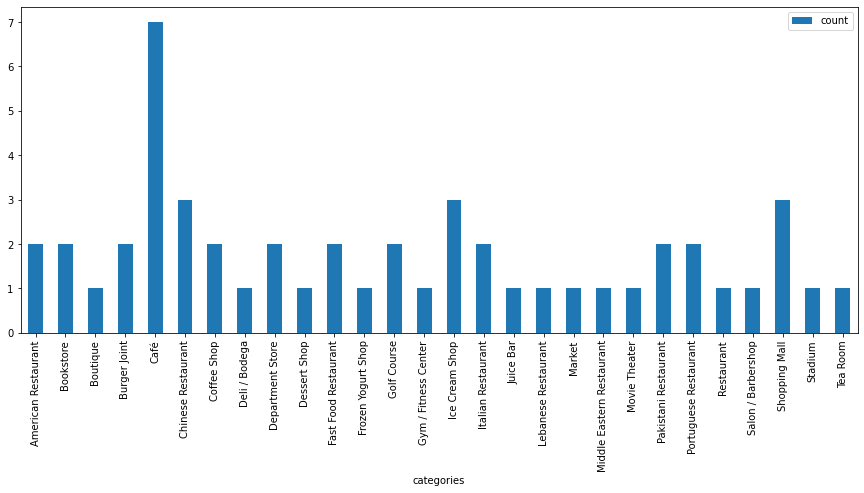

In [165]:
count_lhr.reset_index(inplace=True)

count_lhr = count_lhr[['categories', 'name']]
count_lhr = count_lhr.rename(columns={'name': 'count'})
count_lhr.set_index('categories', inplace=True)
count_lhr.plot(kind='bar', figsize=(15,6))


In [175]:
count_lhr2 = count_lhr.transpose()
count_lhr2

categories,American Restaurant,Bookstore,Boutique,Burger Joint,Café,Chinese Restaurant,Coffee Shop,Deli / Bodega,Department Store,Dessert Shop,Fast Food Restaurant,Frozen Yogurt Shop,Golf Course,Gym / Fitness Center,Ice Cream Shop,Italian Restaurant,Juice Bar,Lebanese Restaurant,Market,Middle Eastern Restaurant,Movie Theater,Pakistani Restaurant,Portuguese Restaurant,Restaurant,Salon / Barbershop,Shopping Mall,Stadium,Tea Room
count,2,2,1,2,7,3,2,1,2,1,2,1,2,1,3,2,1,1,1,1,1,2,2,1,1,3,1,1


In [69]:
lhr_venues_map = folium.Map(location=[lhr_latitude, lhr_longitude], zoom_start=12) # generate map centred around the Airport

# add a red circle marker to represent the 
folium.CircleMarker(
    [31.5230777, 74.4034256,],
    radius=10,
    color='red',
    popup='Allama Iqbal International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(lhr_venues_map)

# add the blue circle markers
for lat, lng, label in zip(lhr_nearby_venues.lat, lhr_nearby_venues.lng, lhr_nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(lhr_venues_map)

# display map
lhr_venues_map


## 3. Islamabad

Getting location for Islamabad

In [70]:
address = 'Islamabad City, ISB'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
isb_latitude = location.latitude
isb_longitude = location.longitude
print('The geograpical coordinate of Islamabad City are {}, {}.'.format(isb_latitude, isb_longitude))


The geograpical coordinate of Islamabad City are 33.5518088, 72.8256323675414.


Map of Islamabad

In [71]:

# create map of Islamabad using latitude and longitude values
map_isb = folium.Map(location=[isb_latitude, isb_longitude], zoom_start=12)

# add a red circle marker to represent the Airport
folium.CircleMarker(
    [isb_latitude, isb_longitude],
    radius=10,
    color='red',
    popup='Islamabad International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(map_isb)

map_isb


In [100]:
LIMIT = 100 # limit of number of venues returned by Foursquare API

radius = 50000 # define radius
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    isb_latitude, 
    isb_longitude, 
    radius, 
    LIMIT)
url


'https://api.foursquare.com/v2/venues/explore?&client_id=RXLAKTPOOGZPJQS0HJ4TMT0ULANSEV5QOTPWII3G5AM24AXX&client_secret=0FPGQCNGJY5LJ5REGK442BOP1TY54YMHVUDWZ3EE235JMQXP&v=20180604&ll=33.5518088,72.8256323675414&radius=50000&limit=100'

In [101]:
isb_results = requests.get(url).json()
isb_results


{'meta': {'code': 200, 'requestId': '5fc96ee6b708d755f783f70d'},
 'response': {'headerLocation': 'Current map view',
  'headerFullLocation': 'Current map view',
  'headerLocationGranularity': 'unknown',
  'totalResults': 54,
  'suggestedBounds': {'ne': {'lat': 34.001809250000456,
    'lng': 73.36459034327865},
   'sw': {'lat': 33.10180834999955, 'lng': 72.28667439180415}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '50634ede498e1f5f3ad8ed3b',
       'name': 'HM Super Market',
       'location': {'address': 'G-15 Markaz',
        'lat': 33.6319199583328,
        'lng': 72.92167446716375,
        'labeledLatLngs': [{'label': 'display',
          'lat': 33.6319199583328,
          'lng': 72.92167446716375}],
        'distance': 12603,
        'cc': 'PK',
        'city':

In [102]:
#Getting a list of venues near Allama Iqbal International Airport

isb_venues = isb_results['response']['groups'][0]['items']
    
isb_nearby_venues = json_normalize(isb_venues) # flatten JSON

# filter columns
isb_filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
isb_nearby_venues =isb_nearby_venues.loc[:, isb_filtered_columns]

# filter the category for each row
isb_nearby_venues['venue.categories'] = isb_nearby_venues.apply(get_category_type, axis=1)

# clean columns
isb_nearby_venues.columns = [col.split(".")[-1] for col in isb_nearby_venues.columns]

isb_nearby_venues



/home/jupyterlab/conda/envs/python/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  """


,name,categories,lat,lng
0,HM Super Market,Department Store,33.631920,72.921674
1,D.Watson,Pharmacy,33.696279,73.012849
2,Tandoori Restaurant,Pakistani Restaurant,33.686607,73.006070
3,Tehzeeb Bakers,Bakery,33.682704,72.980515
4,Tutti Frutti,Ice Cream Shop,33.684594,72.988485
5,RawalPindi Golf Club,Golf Course,33.576840,73.077342
6,Lok Virsa Museum,History Museum,33.688942,73.072550
7,Shinwari,BBQ Joint,33.685101,73.042721
8,Tahzeeb Bakery,Bakery,33.586199,73.087736
9,One Potato Two Potato,Wings Joint,33.684718,72.986162


In [103]:
print('{} venues were returned by Foursquare.'.format(isb_nearby_venues.shape[0]))


54 venues were returned by Foursquare.


In [166]:

count_isb = isb_nearby_venues.groupby('categories').count()

<AxesSubplot:xlabel='categories'>

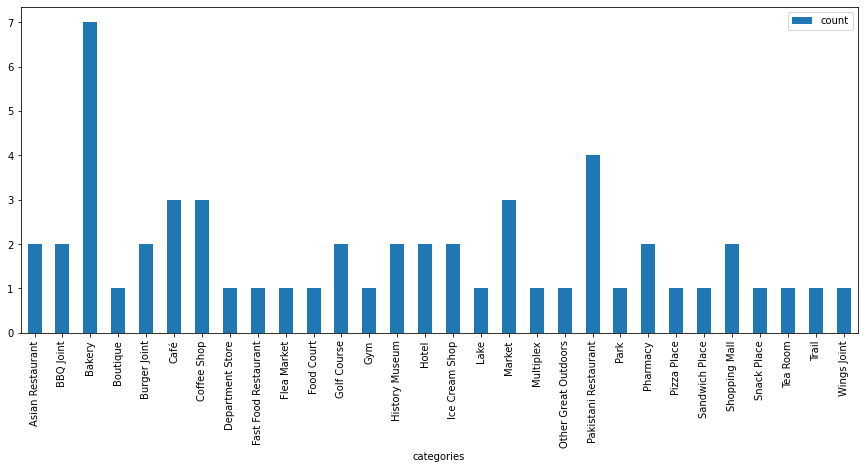

In [167]:
count_isb.reset_index(inplace=True)

count_isb = count_isb[['categories', 'name']]
count_isb = count_isb.rename(columns={'name': 'count'})
count_isb.set_index('categories', inplace=True)
count_isb.plot(kind='bar', figsize=(15,6))

In [176]:
count_isb2 = count_isb.transpose()
count_isb2

categories,Asian Restaurant,BBQ Joint,Bakery,Boutique,Burger Joint,Café,Coffee Shop,Department Store,Fast Food Restaurant,Flea Market,Food Court,Golf Course,Gym,History Museum,Hotel,Ice Cream Shop,Lake,Market,Multiplex,Other Great Outdoors,Pakistani Restaurant,Park,Pharmacy,Pizza Place,Sandwich Place,Shopping Mall,Snack Place,Tea Room,Trail,Wings Joint
count,2,2,7,1,2,3,3,1,1,1,1,2,1,2,2,2,1,3,1,1,4,1,2,1,1,2,1,1,1,1


In [104]:
isb_venues_map = folium.Map(location=[isb_latitude, isb_longitude], zoom_start=14) # generate map centred around the Airport

# add a red circle marker to represent the 
folium.CircleMarker(
    [isb_latitude, isb_longitude],
    radius=10,
    color='red',
    popup='Islamabad International Airport',
    fill = True,
    fill_color = 'red',
    fill_opacity = 0.6
).add_to(isb_venues_map)

# add the  blue circle markers
for lat, lng, label in zip(isb_nearby_venues.lat, isb_nearby_venues.lng, isb_nearby_venues.categories):
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(isb_venues_map)

# display map
isb_venues_map
